In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [71]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
balancer = SMOTE()
x, y = balancer.fit_resample(X, Y)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 8), (161, 8), (375,), (161,))

In [73]:
clf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=16, min_samples_split=2, min_samples_leaf=1, class_weight="balanced")
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=16)

In [74]:
clf.score(x_train, y_train)

1.0

In [75]:
clf.score(x_test, y_test)

0.7391304347826086

In [76]:
y_pred = clf.predict(x_test)

In [77]:
confusion_matrix(y_test, y_pred)

array([[58, 23],
       [19, 61]], dtype=int64)

Text(0.5, 33.0, 'Predicted labels')

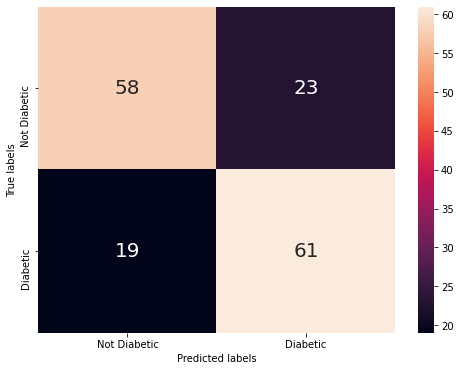

In [78]:
plt.figure(figsize=(8, 6))
ticks = ['Not Diabetic', 'Diabetic']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=ticks, yticklabels=ticks, annot_kws={"size":20})
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

<AxesSubplot:>

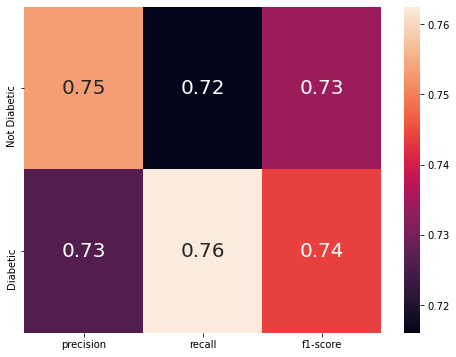

In [79]:
plt.figure(figsize=(8, 6))
report = classification_report(y_test, y_pred, output_dict=True, target_names=ticks)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :2].T, annot=True, annot_kws={"size":20})